# Proyecto Final | Data Science 1

Augusto Lopez Brenot

## Dataset seleccionado - Información sobre ACV

Fuente: Kaggle - https://www.kaggle.com/datasets/zzettrkalpakbal/full-filled-brain-stroke-dataset/data

Un accidente cerebrovascular es una condición médica en la que un flujo sanguíneo deficiente al cerebro provoca la muerte de las células. Hay dos tipos principales de accidente cerebrovascular: isquémico, debido a la falta de flujo sanguíneo, y hemorrágico, debido a una hemorragia. Ambos provocan que partes del cerebro dejen de funcionar correctamente. Los signos y síntomas de un accidente cerebrovascular pueden incluir la incapacidad de mover o sentir un lado del cuerpo, problemas para comprender o hablar, mareos o pérdida de visión en un lado. Los síntomas de un accidente cerebrovascular pueden ser permanentes. Las complicaciones a largo plazo pueden incluir neumonía y pérdida del control de la vejiga, discapacidad permanente e incluso la muerte. Existen numerosos factores que contribuyen al desarrollo de un acv, entre los que se encuentran enfermedades previas, niveles de colesterol, glucemia e hipertensión entre otros.

El dataset contiene distintos datos de pacientes que engloban variables sociodemográficas (Género, edad, estado civil, tipo de residencia y tipo de trabajo), recopila información sobre condiciones previas (Hipertensión, tabaquismo) y variables fácilmente medibles como el IMC o valores de glucemia.



## Objetivo del proyecto

De los tres datasets propuestos en la primer preentrega y validados por los tutores, se eligió continuar el trabajo y entrenar el modelo con un dataset proviniente de Kaggle, que intentará predecir o flaguear pacientes con potencial para desarrollar un episodio de acidente cerebro-vascular isquémico  (ACV) basados en parámetros bioquímicos y sociodemográficos fácilmente obtenibles en una consulta médica simple.

El objetivo de este proyecto es la selección, limpieza y procesamiento de los datos de un dataset, para poder ser utilizado para entrenar y validar un modelo usando aprendizaje supervisado. En este caso el objetivo es utilizar un modelo de clasificación, que sea capaz de, imputándole nuevos datos de las variables de interés de los pacientes, este clasifique a los pacientes con mayor riesgo potencial de desarrollar un ACV, para poder programar consultas, seguimientos y terapéuticas tempranas, que permitan una mejora en la calidad de vida de los pacientes, así como evitar casos graves de este tipo de cuadros gracias a una correcta prevención.

In [1]:
# Importar librerías y montar Drive

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import drive
drive.mount('/content/drive')
import os

In [2]:
# Leemos el .csv desde drive y creamos el df

df_acv = pd.read_csv('/content/drive/MyDrive/Coderhouse/Science/Datasets/acv_data1.csv')
df_acv.columns = df_acv.columns.str.title()

df_acv.shape

(4981, 11)

In [3]:
df_acv.head()

,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,Bmi,Smoking_Status,Stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
# Determinar si existen datos nulos en el df

df_acv.info()
df_acv.isna().sum()

# No existen datos nulos en el df, listo para graficar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             4981 non-null   object 
 1   Age                4981 non-null   float64
 2   Hypertension       4981 non-null   int64  
 3   Heart_Disease      4981 non-null   int64  
 4   Ever_Married       4981 non-null   object 
 5   Work_Type          4981 non-null   object 
 6   Residence_Type     4981 non-null   object 
 7   Avg_Glucose_Level  4981 non-null   float64
 8   Bmi                4981 non-null   float64
 9   Smoking_Status     4981 non-null   object 
 10  Stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


,0
Gender,0
Age,0
Hypertension,0
Heart_Disease,0
Ever_Married,0
Work_Type,0
Residence_Type,0
Avg_Glucose_Level,0
Bmi,0
Smoking_Status,0


In [5]:
df_acv.describe()

,Age,Hypertension,Heart_Disease,Avg_Glucose_Level,Bmi,Stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


## Análisis exploratorio del dataset

Algunas preguntas que podríamos determinar con el EDA del dataset van referidas a la descripción de la población estudiada.

- ¿Cómo se distribuye la edad en la muestra? ¿Existen pacientes pediátricos? (niños o adolescentes). ¿Ha sufrido alguno de estos un ACV?

- ¿Existe un predominio de individuos en la muestra, con respecto a las variables sociodemográficas, que pueda inducir sesgos en la predicción?

- ¿Qué porcentaje de individuos ha sido diagnosticado con un ACV?

- ¿Cómo es la distribución de los datos de los valores de IMC y glucemia? ¿Se ajustan a los valores esperados en una población sana o existen sesgos muestales?

- ¿Existe correlación entre las variables Edad, IMC y Glucemia?

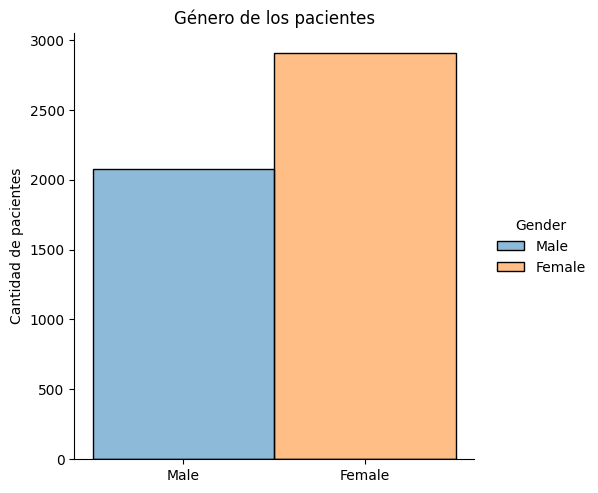

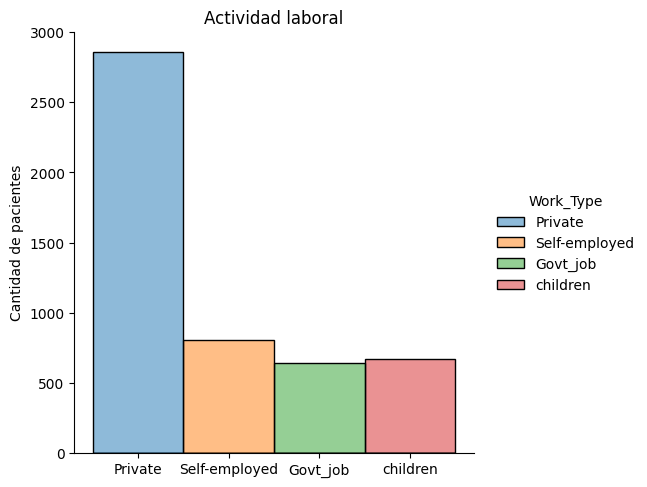

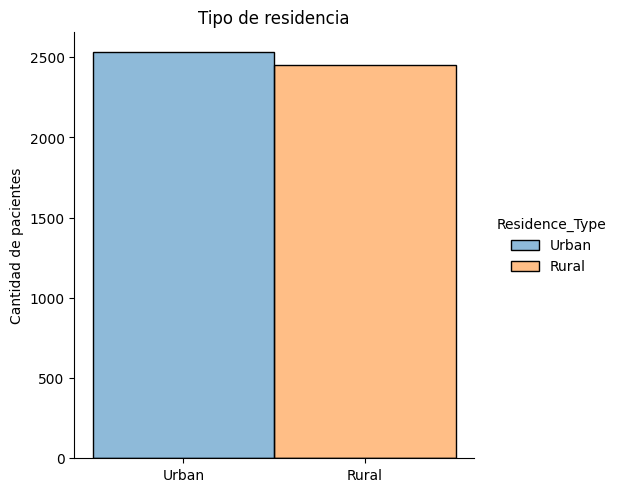

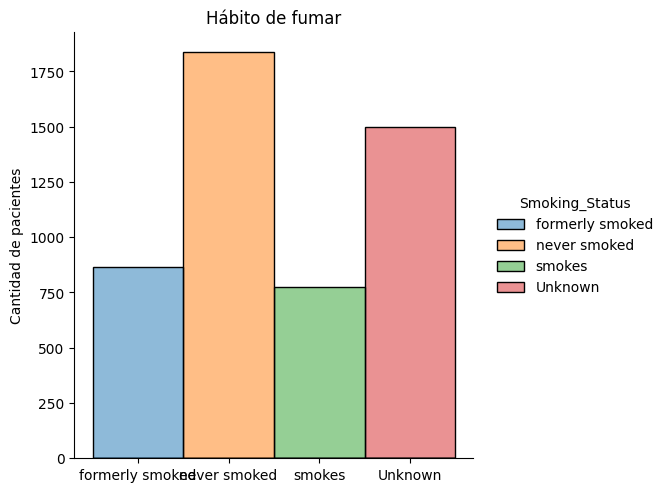

In [ ]:
# Distribución de la muestra, variables categóricas

sns.displot(data=df_acv, x='Gender', hue='Gender')
plt.title("Género de los pacientes")
plt.xlabel("")
plt.ylabel("Cantidad de pacientes")
plt.show()

sns.displot(data=df_acv, x='Work_Type', hue='Work_Type')
plt.title("Actividad laboral")
plt.xlabel("")
plt.ylabel("Cantidad de pacientes")
plt.show()

sns.displot(data=df_acv, x='Residence_Type', hue='Residence_Type')
plt.title("Tipo de residencia")
plt.xlabel("")
plt.ylabel("Cantidad de pacientes")
plt.show()

sns.displot(data=df_acv, x='Smoking_Status', hue='Smoking_Status')
plt.title("Hábito de fumar")
plt.xlabel("")
plt.ylabel("Cantidad de pacientes")
plt.show()

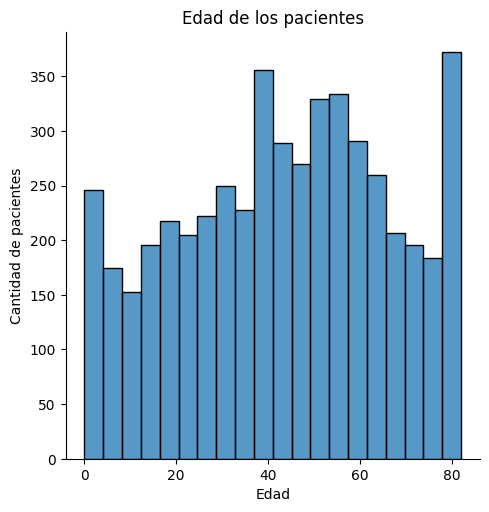

In [ ]:
# Histogramas de distribución usando seaborn

sns.displot(data=df_acv, x='Age')
plt.title("Edad de los pacientes")
plt.xlabel("Edad")
plt.ylabel("Cantidad de pacientes")
plt.show()

Tanto en los gráficos de barras (de actividad laboral), como en el histograma de edad, se evidencia que hay un porcentaje de la muestra que corresponde a pacientes pediátricos (niños). Se realiza un filtro para corroborar si estos han padecido algún episodio, revelando que fue solo un caso aislado.

In [ ]:
df_acv[(df_acv['Age'] <= 10) & (df_acv['Stroke'] > 0)]

,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,Bmi,Smoking_Status,Stroke
4807,Female,1.32,0,0,No,children,Urban,70.37,18.7,Unknown,1


La distribución de los valores de la edad no sigue estrictamente una curva de población normal, pero dada la patología a estudiar (ACV) es normal que la mayoría o un gran porcentaje de la muestra sean adultos mayores. Podríamos ver incluso tres rangos etarios modales: Pediátricos (0-5), adultos (40-60) y adultos mayores (80).

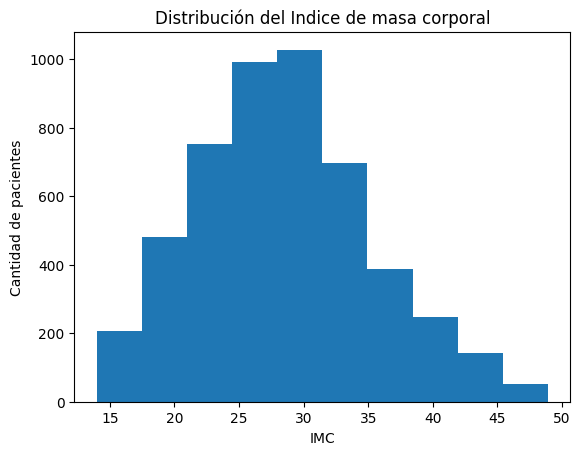

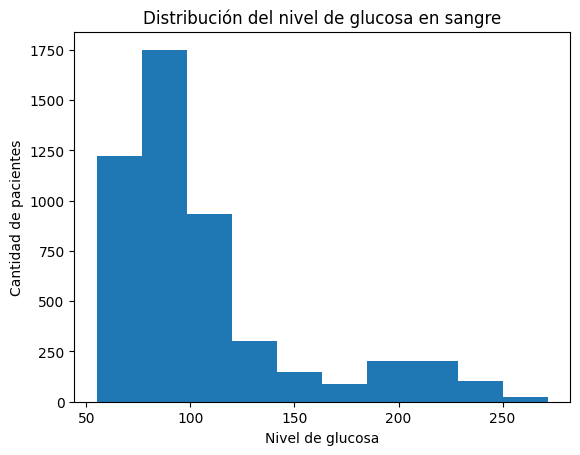

In [ ]:
# Histogramas de distribución usando matplotlib

plt.hist(df_acv['Bmi'])
plt.title("Distribución del Indice de masa corporal")
plt.xlabel("IMC")
plt.ylabel("Cantidad de pacientes")
plt.show()

plt.hist(df_acv['Avg_Glucose_Level'])
plt.title("Distribución del nivel de glucosa en sangre")
plt.xlabel("Nivel de glucosa")
plt.ylabel("Cantidad de pacientes")
plt.show()

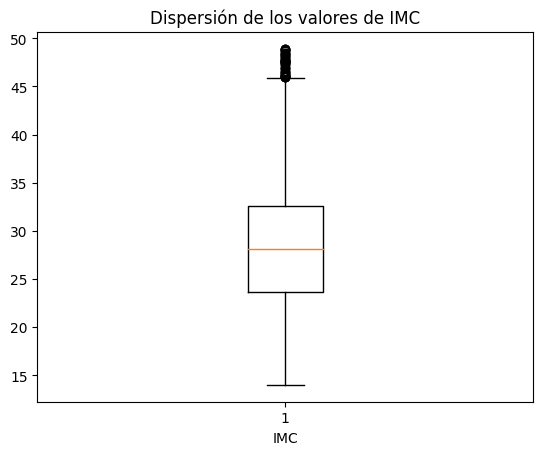

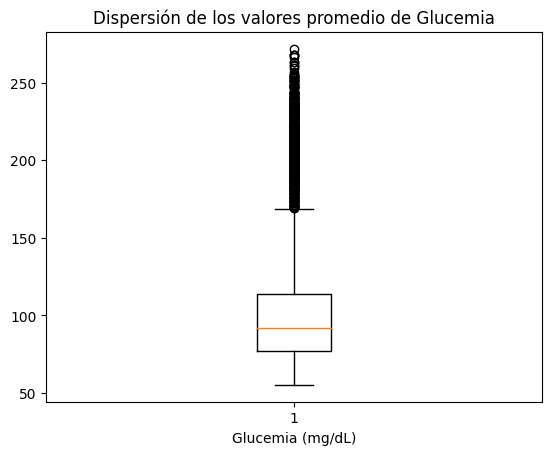

In [ ]:
# Dispersión de valores
plt.boxplot(data=df_acv, x='Bmi')
plt.title("Dispersión de los valores de IMC")
plt.xlabel("IMC")
plt.show()

plt.boxplot(data=df_acv, x='Avg_Glucose_Level')
plt.title("Dispersión de los valores promedio de Glucemia")
plt.xlabel("Glucemia (mg/dL)")
plt.show()

Si tenemos en cuenta el índice de masa corporal, la muestra analizada en este set de datos tiene una distribución que se ajusta aproximadamente a una distribución normal, con un leve alargamiento de la cola a la derecha, ya que son mas frecuentes en la población (mayormente adulta) los valores mas altos de IMC. Con respecto a los datos de glucemia, teniendo en contexto que los valores normales de referencia se encuentran entre 70 - 100 mg/dl, podemos considerar que la distribución se ajusta en gran parte a lo esperado, pero encontramos un aumento de pacientes, que tienen un nivel de glucemia medio, mas elevado de lo normal (entre los 200 - 250).

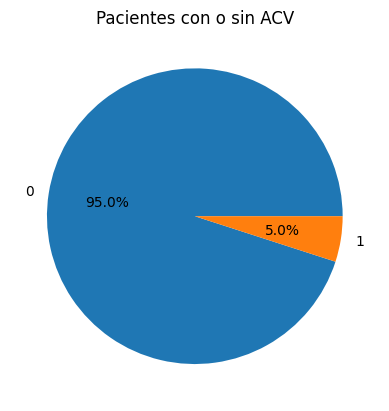

In [ ]:
# Cantidad de pacientes con ACV

# Agrupar por 'Stroke' y contar la cantidad en cada grupo
acv_counts = df_acv.groupby(['Stroke'])['Stroke'].count()

# Crear el gráfico circular
plt.pie(acv_counts, labels=acv_counts.index, autopct='%1.1f%%')
plt.title("Pacientes con o sin ACV")
plt.show()

En este caso, vemos que las clases (Positivo y Negativo) se encuentran desbalanceadas, por lo que será necesario al momento de validar, usar recall o presicion como métrica para evaluar.
Sería importante tener cuidado con los falsos negativos, uno que yo digo que no tiene acv y si podía. sería mucho peor que un falso positivo, que se puede evaluar con clínica y descartar.


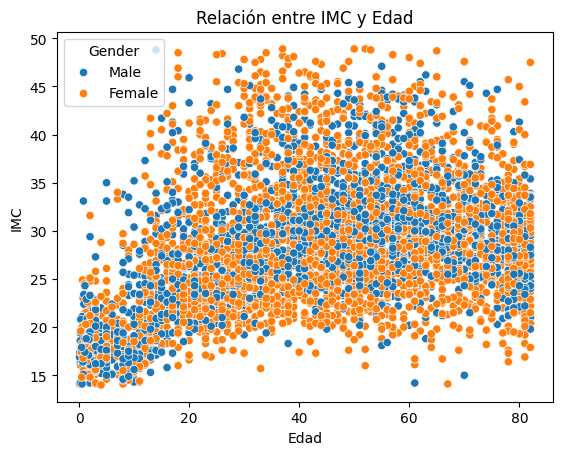

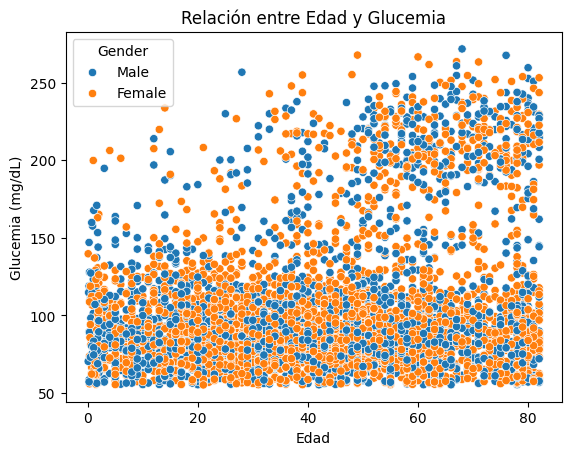

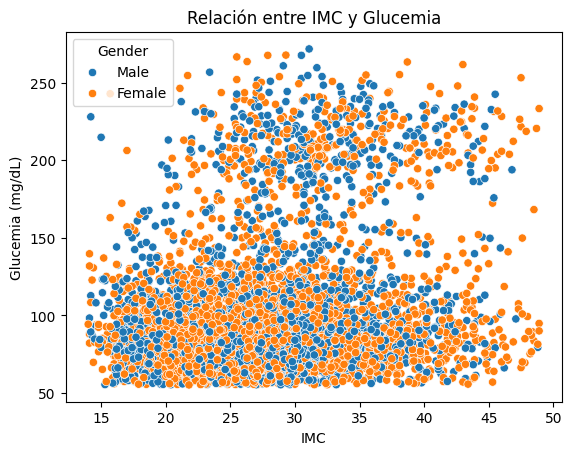

In [ ]:
# Scatterplots

sns.scatterplot(data=df_acv, y='Bmi', x='Age', hue= 'Gender')
plt.title("Relación entre IMC y Edad")
plt.ylabel("IMC")
plt.xlabel("Edad")
plt.show()

sns.scatterplot(data=df_acv, x='Age', y='Avg_Glucose_Level', hue= 'Gender')
plt.title("Relación entre Edad y Glucemia")
plt.xlabel("Edad")
plt.ylabel("Glucemia (mg/dL)")
plt.show()

sns.scatterplot(data=df_acv, x='Bmi', y='Avg_Glucose_Level', hue= 'Gender')
plt.title("Relación entre IMC y Glucemia")
plt.xlabel("IMC")
plt.ylabel("Glucemia (mg/dL)")
plt.show()

No se encuentra ningún patrón o correlación significativa entre los parámetros ensayados.

## Preprocesamiento de los datos para entrenamiento del modelo

### Variables categóricas
El dataset contiene varias columnas que poseen datos categóricos nominales, es decir que las categorías no guardan ningún orden jerárico entre sí. Para poder ingresar los datos al modelo para su entrenamiento, es necesario realizar una transformación de estos mediante la técnica de **one hot encoding**.

Durante el análisis exploratorio de los datos, se encontró que la columna de hábitos de fumar, posee una gran cantidad de registros en los que la categoría es desconocido.

Como opciones posibles se podría:
- Eliminar la columna, considerando la desventaja de perder una variable que potencialmente puede ser relevante para predecir el riesgo cardiovascular, ya que el tabaquismo es un factor de riesgo importante.
- Imputar datos desconocidos, por la moda teniendo en cuenta la posibilidad de introducir un sesgo si hay muchos valores "desconocido", ya que se estaría asumiendo que el comportamiento de la mayoría se aplica a todos.
- Considerar la categoría desconocido, asumiendo el valor "desconocido" como una categoría aparte, agregándolo como una clase adicional. En este caso no se introduce sesgo imputando valores falsos, o eliminando datos, pero puede verse afectada la precisión del modelo.

Se decide, ya que la imputación resulta demasiado complicada o poco confiable, tratar el valor "desconocido" como una categoría separada en el modelo, lo que permite que el modelo aprenda a trabajar con esta falta de información.

In [ ]:
# Opción 1: Eliminar la columna
# Eliminamos la columna Smokin_Status por presentar una muy importante cantidad de datos desconocidos

#df_acv.drop('Smoking_Status', axis='columns', inplace=True)

In [ ]:
# Opción 2: Imputación por moda de valores "Unknown"

#moda_smoking = df_acv['Smoking_Status'].mode()[0]
#df_acv['Smoking_Status'].replace('Unknown', moda_smoking, inplace=True)

# Verificar si aún existen valores "desconocido"
#print(df_acv['Smoking_Status'].value_counts())

In [6]:
# Aplicar one-hot encoding usando pandas para variables categóricas nominales
df_encoded = pd.get_dummies(df_acv, dtype=int)

df_encoded.head()

,Age,Hypertension,Heart_Disease,Avg_Glucose_Level,Bmi,Stroke,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Work_Type_Govt_job,Work_Type_Private,Work_Type_Self-employed,Work_Type_children,Residence_Type_Rural,Residence_Type_Urban,Smoking_Status_Unknown,Smoking_Status_formerly smoked,Smoking_Status_never smoked,Smoking_Status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0
1,80.0,0,1,105.92,32.5,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0
2,49.0,0,0,171.23,34.4,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1
3,79.0,1,0,174.12,24.0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0
4,81.0,0,0,186.21,29.0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0


### Variables numéricas

El dataset cuenta con dos variables numéricas, el IMC y nos niveles de glucemia. Según lo visto en el EDA, considerando que ambas columnas no presentan una distribución normal, y ambas presentan una cantidad significativa de outliers, se opta por realizar un escalado robusto (Robust Scaler) ya que esta es una forma de escalado resistente a los outliers al no depender de la media o de valores extremos.

In [7]:
# Normalizado de variables numéricas

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_encoded[['Bmi', 'Avg_Glucose_Level']] = scaler.fit_transform(df_encoded[['Bmi', 'Avg_Glucose_Level']])

df_encoded.head()

,Age,Hypertension,Heart_Disease,Avg_Glucose_Level,Bmi,Stroke,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Work_Type_Govt_job,Work_Type_Private,Work_Type_Self-employed,Work_Type_children,Residence_Type_Rural,Residence_Type_Urban,Smoking_Status_Unknown,Smoking_Status_formerly smoked,Smoking_Status_never smoked,Smoking_Status_smokes
0,67.0,0,1,3.735736,0.955056,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0
1,80.0,0,1,0.384111,0.494382,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0
2,49.0,0,0,2.167076,0.707865,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1
3,79.0,1,0,2.245973,-0.460674,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0
4,81.0,0,0,2.576031,0.101124,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0


In [8]:
# Normalización de la variable edad

from sklearn.preprocessing import MinMaxScaler
scaler_age = MinMaxScaler()

df_encoded[['Age']] = scaler_age.fit_transform(df_encoded[['Age']])

df_encoded.head()

,Age,Hypertension,Heart_Disease,Avg_Glucose_Level,Bmi,Stroke,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Work_Type_Govt_job,Work_Type_Private,Work_Type_Self-employed,Work_Type_children,Residence_Type_Rural,Residence_Type_Urban,Smoking_Status_Unknown,Smoking_Status_formerly smoked,Smoking_Status_never smoked,Smoking_Status_smokes
0,0.816895,0,1,3.735736,0.955056,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0
1,0.975586,0,1,0.384111,0.494382,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0
2,0.597168,0,0,2.167076,0.707865,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1
3,0.963379,1,0,2.245973,-0.460674,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0
4,0.987793,0,0,2.576031,0.101124,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0


## Entrenamiento de los modelos

### Árbol de decisión

In [28]:
# Preparación del dataset de Train y de Test

from sklearn.model_selection import train_test_split
from sklearn import metrics

X = df_encoded.drop('Stroke', axis=1)
y = df_encoded['Stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Entrenamiento y testeo del modelo de Árbol de decisión

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier(random_state=1234, max_depth=3)
model_tree = clf.fit(X_train, y_train)

y_pred = model_tree.predict(X_test)

In [30]:
# Evaluación de la performance del modelo de árbol de decisión

from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.9458375125376128
Precision: 0.5
Recall: 0.018518518518518517
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.50      0.02      0.04        54

    accuracy                           0.95       997
   macro avg       0.72      0.51      0.50       997
weighted avg       0.92      0.95      0.92       997



Se inició el testeo del modelo con los hiperparámetros por default, al graficar el árbol de decisión se visualizó como se había llegado a tener una cantidad muy elevada de nodos. Se ajusta el hiperparámetro max_depth, acotando la división de categorías, y la performance mejora levemente.

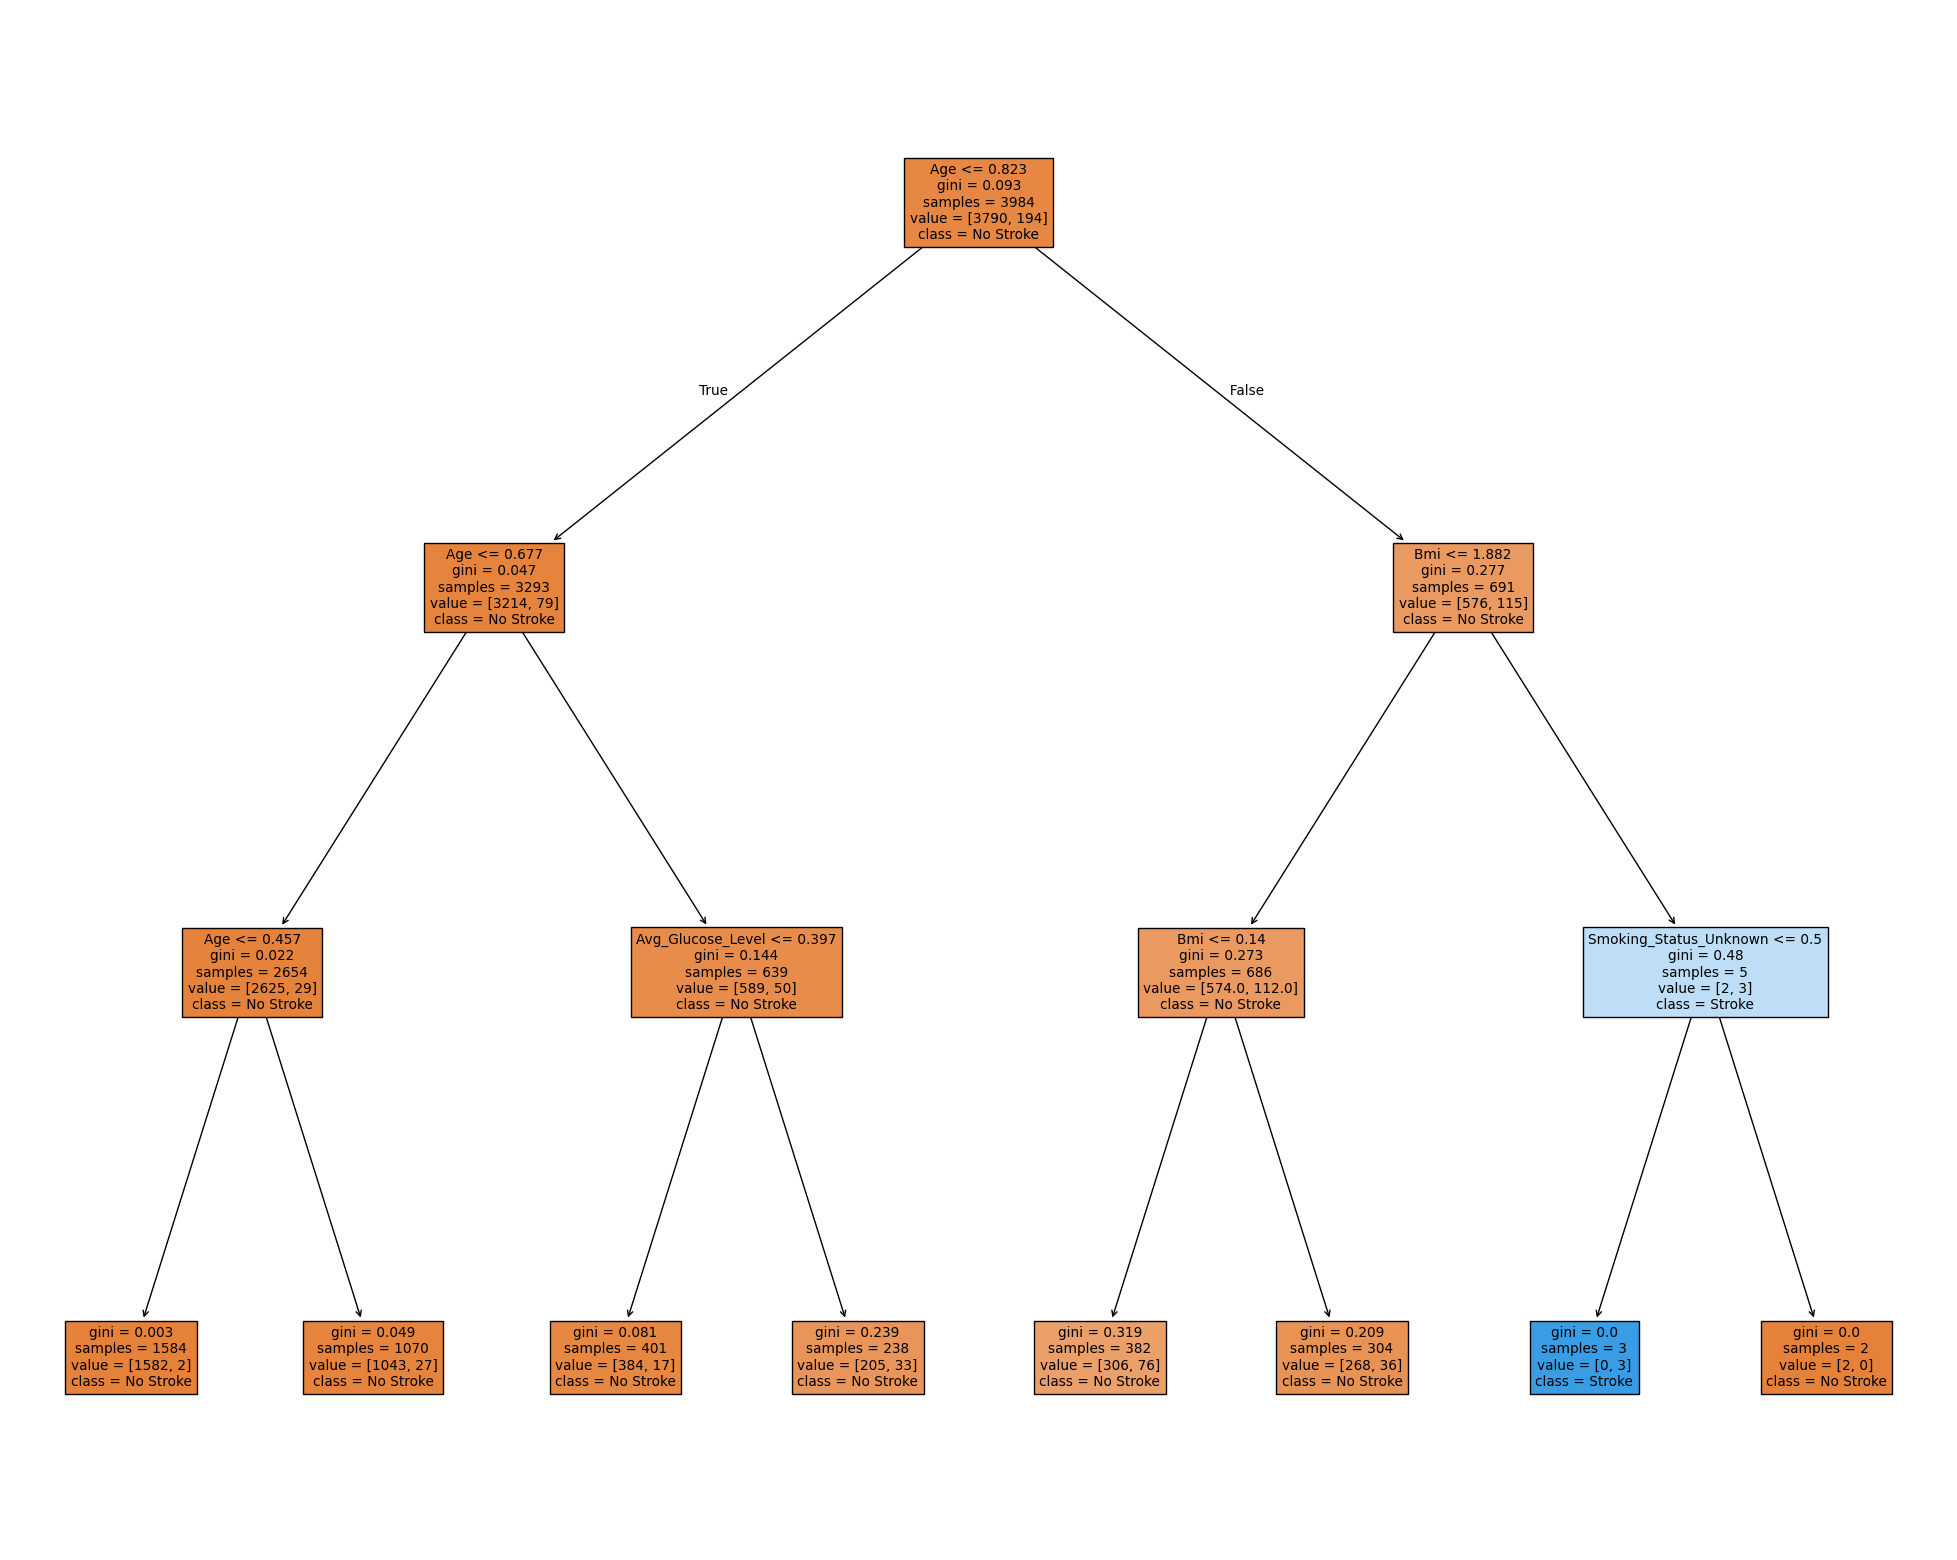

In [ ]:
# Gráfico del árbol de decisión

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_tree,
                   feature_names=X.columns,
                   class_names=['No Stroke', 'Stroke'],
                   filled=True)


### KNN

In [31]:
# Entrenamiento y testeo del modelo

from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
model_knn = clf.fit(X_train, y_train)

y_pred = model_knn.predict(X_test)

In [32]:
# Evaluación de la performance del modelo KNN

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.9458375125376128
Precision: 0.5
Recall: 0.018518518518518517
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.50      0.02      0.04        54

    accuracy                           0.95       997
   macro avg       0.72      0.51      0.50       997
weighted avg       0.92      0.95      0.92       997



Para el entrenamiento de este modelo, se ajustaron dos hiperparámetros n_neighbors, el cual comenzó en 3, luego se amplió a 5, mejorando la performance levemente. Por otro lado se modificó el hiperparámetro weights, desde su opción por defecto 'uniform' a 'distance' pero como la performance fue levemente inferior, se retornó al estado inicial.

### Regresión logística

In [33]:
# Entrenamiento y testeo del modelo

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=1234, class_weight=None, max_iter=50)
model_log = clf.fit(X_train, y_train)

y_pred = model_log.predict(X_test)

In [37]:
# Evaluación de la performance del modelo de Regresión logística

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9458375125376128


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


En este modelo se intentó modificar los hiperparámetros de peso de clases, número máximo de iteraciones y penalización. Todos los intentos de modificación concluyeron en una peor performance, por lo que se volvieron a sus opciones por defecto.

[Text(0, 0.5, 'No Stroke'), Text(0, 1.5, 'Stroke')]

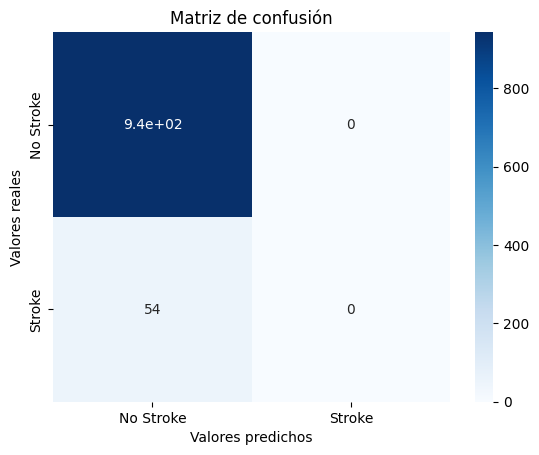

In [ ]:
# Matriz de confusión

from sklearn.metrics import pair_confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusión');
ax.set_xlabel('Valores predichos')
ax.set_ylabel('Valores reales')
ax.xaxis.set_ticklabels(['No Stroke', 'Stroke'])
ax.yaxis.set_ticklabels(['No Stroke', 'Stroke'])

## Recomendaciones y conclusión final

En este proyecto, se entrenaron tres modelos de machine learning, los cuales mostraron una performance idéntica con una exactitud del 95%. Sin embargo, al analizar métricas clave como la precisión, especificidad y sensibilidad, los resultados fueron considerablemente bajos. Este bajo desempeño se debe a un **marcado desbalance en las clases del conjunto de datos**: el 90% de los datos corresponden a pacientes que no presentaron ACV, mientras que solo el 10% de los datos pertenecen a pacientes que sí lo manifestaron.

Si bien esto es esperable debido a la naturaleza de la fisiopatología e incidencia de los accidentes cerebrovasculares, el desbalance de clases trajo complicaciones a la hora de obtener una performance adecuada en los modelos entrenados.

Este desequilibrio en las clases sesga los resultados del modelo, ya que tiende a clasificar incorrectamente a los pacientes que sí presentan ACV, impactando negativamente en la capacidad del modelo para identificar correctamente los casos positivos.

Una solución potencial sería recabar más datos, enfocándose en equilibrar la representación de ambas clases (ACV/No ACV), lo que permitiría mejorar significativamente el rendimiento del modelo y obtener una predicción más precisa y fiable en casos de ACV.

Otras posibilidades para corregir y mejorar la performance debido a este problema de clases desbalanceadas podría ser ajustar el tamaño de la muestra, ya sea disminuyendo la cantidad de registros (ACV negativo) para equipararlo a la otra clase (Undersampling) o bien aumentar sintéticamente la cantidad de registros (ACV Positivo) usando Random Oversampling o SMOTE (Synthetic Minority Over-sampling Technique), teniendo en cuenta que esto tiene una mayor complejidad y puede generar sobreajuste si se añaden demasiados datos sintéticos o copias.

Otra solución sería modificar uno de los hiperparámetros del modelo (Class Weighting) ajustando el peso que se asigna a cada clase. Al aumentar el peso de la clase minoritaria (ACV), el modelo “presta más atención” a los ejemplos de dicha clase. Esto no altera los datos y permite que el modelo enfoque más en las instancias minoritarias pero puede ser menos efectivo ya que en este caso el desbalance de clases es significativo.

